In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path='/content/drive/MyDrive/CSVFiles/spam_ham_dataset.csv'
df=pd.read_csv(path)

In [5]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df["label"]=df["label"].apply(lambda x: 0 if x=="ham" else 1)

In [9]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(["label_num","label","Unnamed: 0"],axis=1),df["label"],test_size=0.2)

In [83]:
X_test.head(5)

,text
1876,Subject: may wellheads\r\ndavid here is the ot...
3236,Subject: first deliveries - comstock oil & gas...
1897,Subject: re : schedule\r\ni guess he won ' t b...
199,Subject: march business - meter 6490 - help\r\...
2201,Subject: entex adjustments for 5 / 00\r\ni hav...


fit_transform is used only for first time when we are training a model and when we need to test with some data samples we simply use teansform method

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.text)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,Y_train)

MultinomialNB()

In [91]:
model.score(X_train_count,Y_train)

0.9854932301740812

In [92]:
X_test_count=v.transform(X_test.text)
len(X_test_count.toarray()[0])

45120

In [102]:
Y_predicted=model.predict(X_test_count)

In [104]:
Y_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [105]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix=confusion_matrix(Y_test,Y_predicted)

Text(50.722222222222214, 0.5, 'Predicted')

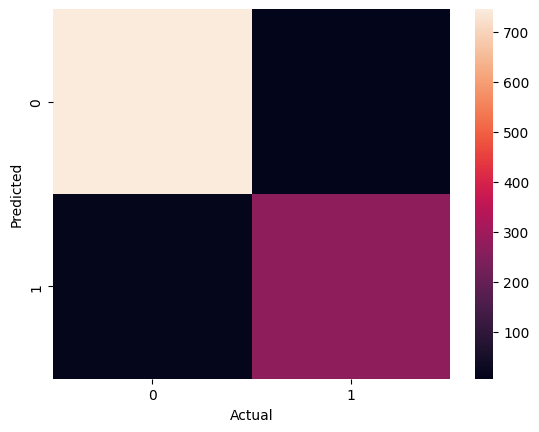

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ConfusionMatrix)
plt.xlabel("Actual")
plt.ylabel("Predicted")

So whenever we want to predict then we need to do all things like transforming the data into 0 and 1's and then predicting values. So we can combine these all things into a single function which is called pipeline in sklearn.

In [110]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('mb',MultinomialNB())
])

In [113]:
clf.fit(X_train.text,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [117]:
clf.score(X_test.text,Y_test)

0.9826086956521739

In [119]:
clf.predict(X_test.text)

array([0, 0, 0, ..., 0, 0, 1])